### 7. custom FFNN
#### 1) 활성화함수가 있는 FFNN
활성화 함수가 있는 FFNN를 구현해 보자.
$$\begin{aligned}
s &= x \cdot w + b \\
\hat y &= f(s) \\
e &= (\hat y - y)^2 \\ 
& \\
\cfrac {\partial e}{\partial w} &= \cfrac{\partial e}{\partial \hat y} \cfrac{\partial \hat y}{\partial s} \cfrac{\partial s}{\partial w} \\
&= x^T \cdot 2(\hat y - y)f^{'}(s)\\
(p, h=1) &= (b, p)^T \cdot [(B, 1) \times (B, 1)]
\end{aligned}$$

참고로:
$$\begin{aligned}
f(x) &= \tanh(x) \\
f^{'}(x) &= 1 - \tanh^2(x)
\end{aligned}$$

이를 위해 propagate_forward(self, x)함수를 구해보자.

In [5]:
%matplotlib inline
import numpy as np
from numpy.random import shuffle, rand

x_train = np.random.rand(1024, 1)
y_train = x_train * 0.1 - 0.05

x_val = np.random.rand(32).reshape(-1,1)
y_val = x_val * 0.1 - 0.05

x_test = np.arange(0, 10, 2).reshape(-1,1)*.1
y_test = x_test * 0.1 - 0.05

In [90]:
class FFNN:
    def __init__(self, lr=0.01):
        self.lr = lr
        # initial weights: w는 .5, b는 .0
        self.w = np.array([0.5]).reshape(-1, 1)
        self.b = np.array([0.])
        
    def calc_sum(self, x, w, b):
        return np.dot(x, w) + b
    
    # feed forward network
    def predict(self, x):
        return np.tanh(self.calc_sum(x, self.w, self.b))
    
    # train for one batch. x 자체가 batch
    def train_on_batch(self, x, y, istrain=True):
        predict_y = self.predict(x)
        loss = np.sum((predict_y - y) ** 2)
        
        if istrain:
            qq = 2*(predict_y - y) * (1 - np.tanh(predict_y.T)**2).T 
            
            dw = np.dot(x.T, qq)
            db = np.sum(predict_y - y)
            
            self.w -= self.lr * dw
            self.b -= self.lr * db
        return loss
    
    def fit(self, x, y, batch_size=16, epochs=100, val_data=None):
        Losses = {}
        Losses["train_loss"] = []
        if val_data is not None:
            Losses["val_loss"] = []
        randRow = np.arange(x.shape[0])
        test_case = int(x.shape[0]//batch_size)
        
        for i in range(epochs):
            Loss = 0
            shuffle(randRow)
            
            for t in range(test_case):
                batch_idx = t*batch_size
                x_batch = x[randRow[batch_idx: batch_idx+batch_size]]
                y_batch = y[randRow[batch_idx: batch_idx+batch_size]]
                
                Loss += self.train_on_batch(x_batch, y_batch)
            
            Losses["train_loss"].append(Loss)
            if val_data is not None:
                Loss = self.train_on_batch(x_val, y_val, False)
                Losses["val_loss"].append(Loss)
                
        return Losses

In [91]:
model = FFNN()

In [92]:
hist = model.fit(x_train, y_train, val_data=(x_val, y_val))

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

hist
# loss의 결과를 시각화하세요.

{'train_loss': [4.434472738455791,
  0.19176601890560616,
  0.021380413394358422,
  0.002413386113433674,
  0.0002729429821368439,
  3.056425140021673e-05,
  3.47991503599424e-06,
  4.366150673920635e-07,
  8.8759742932386e-08,
  4.879672410829933e-08,
  4.427536364291011e-08,
  4.386643159526337e-08,
  4.387460642879483e-08,
  4.384745101671956e-08,
  4.3903063073931745e-08,
  4.3960664801581614e-08,
  4.37034055295818e-08,
  4.381849444018433e-08,
  4.3678003865347646e-08,
  4.372247634082439e-08,
  4.373393205587906e-08,
  4.381950750593572e-08,
  4.391908177576956e-08,
  4.375244730734906e-08,
  4.420520063796169e-08,
  4.381848206478927e-08,
  4.356956115827267e-08,
  4.38295414430262e-08,
  4.396432439434567e-08,
  4.381312246184401e-08,
  4.361613716035145e-08,
  4.382281807686829e-08,
  4.383991969219114e-08,
  4.4060621552363454e-08,
  4.376876006627851e-08,
  4.375160916320324e-08,
  4.3732522890854844e-08,
  4.372872075052395e-08,
  4.3821573513436426e-08,
  4.37698823820592

In [94]:
df = pd.DataFrame(hist)

In [95]:
pd.DataFrame({'pred':model.predict(x_test).ravel(), 'target':y_test.ravel()})

,pred,target
0,-0.049984,-0.05
1,-0.030006,-0.03
2,-0.010005,-0.01
3,0.010005,0.01
4,0.030006,0.03


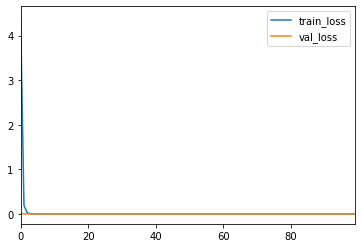

In [96]:
df.plot()

In [97]:
model.w

array([[0.10005107]])

In [98]:
model.b

array([-0.05002536])